# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



In [27]:
import pandas as pd

df = pd.read_csv("Employee_productivity.csv")

print(df.head())
print(df.info())


   HoursWorked  FocusScore  ProductivityScore   Department  YearsAtCompany  \
0         42.4         6.3            3127.96  Engineering              17   
1         34.0         7.2            4742.60           HR               8   
2         47.2         5.6            2044.73        Sales              15   
3         38.4         9.0            5818.92           HR               5   
4         36.4         2.5            1841.31        Sales               9   

   TeamMeetingsPerWeek    DeskLocation  
0                    0       Open Plan  
1                    6  Private Office  
2                    3          Remote  
3                    6  Private Office  
4                    6          Remote  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float64
 1   FocusScore           300 n

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def run_simple_regression(df, feature, target="Productivity"):
    X = df[[feature]].values
    y = df[target].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    plt.figure()
    plt.scatter(X, y)
    plt.plot(X, y_pred)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target} (R² = {r2:.3f})")
    plt.show()

    return r2


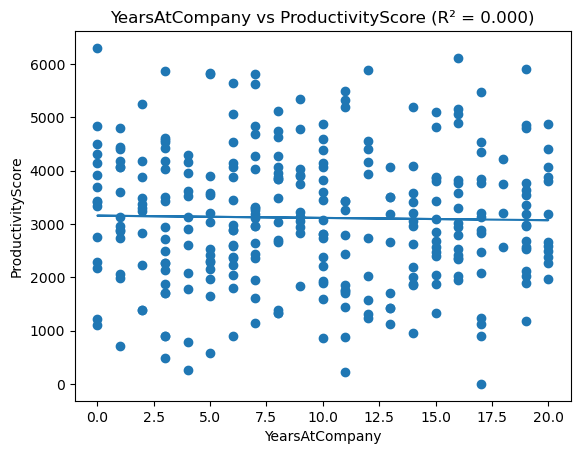

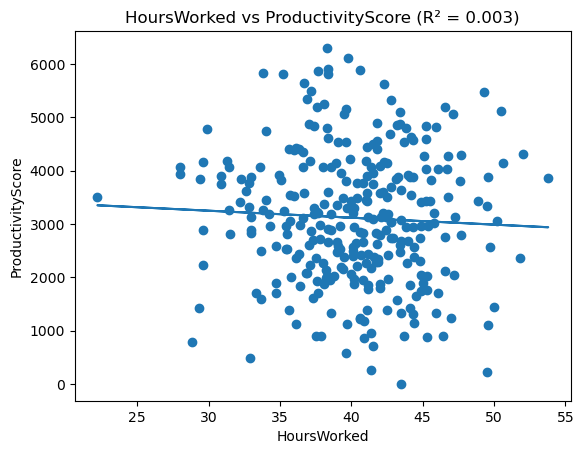

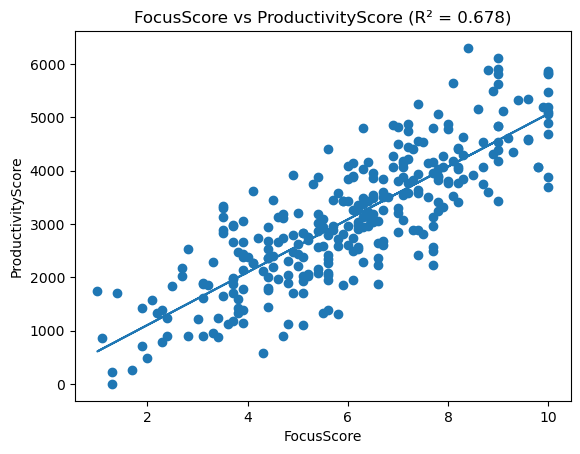

R² Values
Years at Company: 0.00041152919389664255
Hours Worked: 0.0025999350022652967
Focus: 0.6776960770307456


In [29]:
r2_years = run_simple_regression(df, "YearsAtCompany", "ProductivityScore")
r2_hours = run_simple_regression(df, "HoursWorked", "ProductivityScore")
r2_focus = run_simple_regression(df, "FocusScore", "ProductivityScore")

print("R² Values")
print("Years at Company:", r2_years)
print("Hours Worked:", r2_hours)
print("Focus:", r2_focus)


In [30]:
numeric_features = [
    "YearsAtCompany",
    "HoursWorked",
    "FocusScore",
    "TeamMeetingsPerWeek"
]

X = df[numeric_features]
y = df["ProductivityScore"]


In [31]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
overall_r2 = r2_score(y, y_pred)

print("Overall Model R²:", overall_r2)


Overall Model R²: 0.6787584261215915


In [32]:
for feature, coef in zip(numeric_features, model.coef_):
    print(f"{feature}: {coef:.3f}")


YearsAtCompany: 2.760
HoursWorked: -3.593
FocusScore: 500.107
TeamMeetingsPerWeek: 19.753


In [ ]:

categorical_cols = ["Department", "DeskLocation"]

df_dummies = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

X = df_dummies.drop(columns=["ProductivityScore"])
y = df_dummies["ProductivityScore"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Full Model R²:", r2_score(y, y_pred))



Full Model R²: 0.6851104801306642


Question 1: Strongest Linear Relationship
The Focus Score has the strongestrelationship with productivity, with the highest R2. The Years at the company and hours worked show weaker correlations between one another.

Question 2: Features Impacting Productivity
With Multiple regressions and with the regression showing, the focus remains the strongest or remains as the stronger predictor. The amount of Meetings per week negatively affect the amount of productivity, hours worked however has a small positive effect, with desk locations in the departments have minor impacts.

Question 3: Summary and Recommendations
Focus is what drives more Productivity. By reducing the amount of unnecessary meeting and bywith this creating a very focus-friendly working environments/conditions. The amount of felxibility in locations can help, while being able to better access and monitor the tenure hours is very less effective.